# Lecture 14 – Data 100, Fall 2021

**by Suraj Rampure**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns

In [2]:
nba = pd.read_csv('nba18-19.csv')

In [3]:
nba

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines\abrinal01,SG,25,OKC,31,2,19.0,1.8,5.1,...,0.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy\acyqu01,PF,28,PHO,10,0,12.3,0.4,1.8,...,0.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams\adamsja01,PG,22,ATL,34,1,12.6,1.1,3.2,...,0.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams\adamsst01,C,25,OKC,80,80,33.4,6.0,10.1,...,0.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo\adebaba01,C,21,MIA,82,28,23.3,3.4,5.9,...,0.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,528,Tyler Zeller\zellety01,C,29,MEM,4,1,20.5,4.0,7.0,...,0.778,2.3,2.3,4.5,0.8,0.3,0.8,1.0,4.0,11.5
704,529,Ante Žižić\zizican01,C,22,CLE,59,25,18.3,3.1,5.6,...,0.705,1.8,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8
705,530,Ivica Zubac\zubaciv01,C,21,TOT,59,37,17.6,3.6,6.4,...,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9
706,530,Ivica Zubac\zubaciv01,C,21,LAL,33,12,15.6,3.4,5.8,...,0.864,1.6,3.3,4.9,0.8,0.1,0.8,1.0,2.2,8.5


## Recap from Lecture 12

In the last lecture, we used this magical package `sklearn` to determine the optimal value of $\hat{\theta}$ for a linear model that uses `AST` and `3PA` to predict `PTS`. (The usage of `sklearn` will be covered in the next lecture.)

Note: We didn't actually cover this part in the video, but it was in the notebook.

In [4]:
model = lm.LinearRegression(fit_intercept = True)

model.fit(nba[['AST', '3PA']], nba['PTS']);

We then looked at the values of the coefficients:

In [5]:
model.coef_

array([1.64065507, 1.25758096])

In [6]:
model.intercept_

2.156347047514834

This meant our model was of the form

$$\text{predicted PTS} = 2.1563 + 1.6407 \cdot \text{AST} + 1.2576 \cdot \text{3PA}$$

## Using `np.linalg.inv` to solve for optimal $\hat{\theta}$

We will now use what we know about the solution to the normal equations to determine $\hat{\theta}$ on our own, by hand. We know that for the ordinary least squares model,

$$\hat{\theta} = (\mathbb{X}^T\mathbb{X})^{-1} \mathbb{X}^T\mathbb{Y}$$

In [7]:
X = nba[['AST', '3PA']]
y = nba['PTS']

In [8]:
X.shape

(708, 2)

Here, our design matrix $\mathbb{X}$ only has two columns. But, in order to incorporate the intercept term (i.e. $\theta_0$), we need to include a column that contains all 1s. This is referred to as the "intercept" or "bias" column. (`sklearn` handled this for us, because we set `fit_intercept = True`. This is actually the default behavior in `sklearn`.)

In [9]:
X.loc[:, 'bias'] = 1

# This line reorders our columns so that column i corresponds to theta_i.
# By default, newly added columns to go to the end of a DataFrame.
# This is not at all necessary; it just makes our resulting theta vector follow a nice order.
X = X[['bias', 'AST', '3PA']]

C:\Users\koiso\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\koiso\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [10]:
X

,bias,AST,3PA
0,1,0.6,4.1
1,1,0.8,1.5
2,1,1.9,2.2
3,1,1.6,0.0
4,1,2.2,0.2
...,...,...,...
703,1,0.8,0.0
704,1,0.9,0.0
705,1,1.1,0.0
706,1,0.8,0.0


In [11]:
def least_squares(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [12]:
theta = least_squares(X, y)

In [13]:
theta

0    2.156347
1    1.640655
2    1.257581
dtype: float64

Here, `theta[0] = 2.156`. Since the first column of `X` is the intercept column, this means that $\theta_0 = 2.1563$. Similarly, we have $\theta_1 = 1.6407$ and $\theta_2 = 1.2576$. These are the exact same coefficients that `sklearn` found for us!

## Residual plots

For the simple linear case, let's revisit Anscombe's quartet.

In [14]:
ans = sns.load_dataset('anscombe')

In [15]:
ans1 = ans[ans['dataset'] == 'I']
ans2 = ans[ans['dataset'] == 'II']

Dataset 1 appears to have a linear trend between $x$ and $y$:

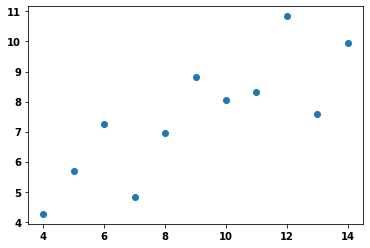

In [16]:
plt.scatter(ans1['x'], ans1['y']);

While dataset 2 does not:

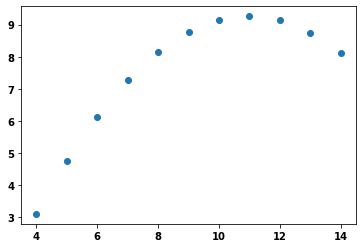

In [17]:
plt.scatter(ans2['x'], ans2['y']);

Let's fit simple linear regression models to both datasets, and look at residual plots of residual vs. $x$.

In [18]:
slr_ans_1 = lm.LinearRegression()
slr_ans_1.fit(ans1[['x']], ans1['y'])
y_pred_ans_1 = slr_ans_1.predict(ans1[['x']])
residual_ans_1 = ans1['y'] - y_pred_ans_1

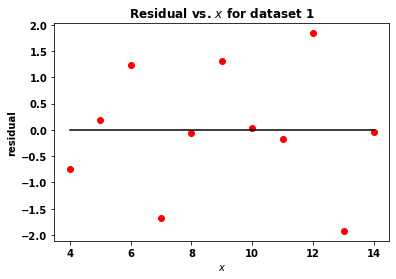

In [19]:
plt.scatter(ans1['x'], residual_ans_1, color = 'red');
plt.plot([4, 14], [0, 0], color = 'black')
plt.xlabel(r'$x$')
plt.ylabel('residual');
plt.title(r'Residual vs. $x$ for dataset 1');

For dataset 1, it appears that the residuals are generally equally spread out, and that there is no trend. This indicates that our linear model was a good fit here. (It is also true that the "positive" and "negative" residuals cancel out, but this is true even when our fit isn't good.)

In [20]:
slr_ans_2 = lm.LinearRegression()
slr_ans_2.fit(ans2[['x']], ans2['y'])
y_pred_ans_2 = slr_ans_2.predict(ans2[['x']])
residual_ans_2 = ans2['y'] - y_pred_ans_2

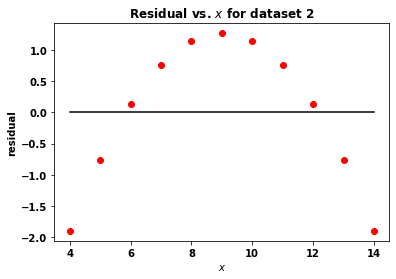

In [21]:
plt.scatter(ans2['x'], residual_ans_2, color = 'red');
plt.plot([4, 14], [0, 0], color = 'black')
plt.xlabel(r'$x$')
plt.ylabel('residual');
plt.title(r'Residual vs. $x$ for dataset 2');

The fit does not appear to be as good here. While the positive and negative residuals cancel out, there is a clear trend – the underlying data has a quadratic relationship, and the residuals reflect that. We'd likely need to increase the complexity of our model here.

As mentioned above, the residuals in both sum to zero, but this is true of any linear model with an intercept term, as discussed in lecture.

In [22]:
residual_ans_1.sum()

-1.7763568394002505e-14

In [23]:
residual_ans_2.sum()

1.021405182655144e-14

For the multiple linear regression case, let's go back to the `nba` data. Let's once again use `AST` and `3PA` to predict `PTS`.

In [24]:
nba_model = lm.LinearRegression()
nba_model.fit(nba[['AST', '3PA']], nba['PTS'])
pts_pred = nba_model.predict(nba[['AST', '3PA']])
residual_nba = nba['PTS'] - pts_pred

In [25]:
fig = go.Figure()

data_scatter = go.Scatter(x = pts_pred, y = residual_nba,
                         mode = 'markers',
                         marker = dict(color = 'red', size = 8), name = 'residuals vs. fitted values')

fig.add_trace(data_scatter)
fig.add_trace(go.Scatter(x = [0, 35], y = [0, 0], name = 'residuals = 0', marker = dict(color = 'black')))
fig.update_layout(margin=dict(l=0, r=0, t=0, b=0), 
                  height=400,
                 xaxis_title=r"Fitted Values",
                 yaxis_title="Residuals")

fig

There isn't a clear pattern, but there seems to be uneven spread.